In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_1samp, mannwhitneyu, kruskal, wilcoxon

In [4]:
df = pd.read_csv("./А_B_cookie_cats.csv")

In [7]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [10]:
df.shape

(90189, 5)

In [29]:
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [12]:
df.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

на всякий случай проверил уникальность userid..... мало ли

In [22]:
df.userid.nunique()

90189

In [25]:
# проверил равномерность групп.... почти одинаковые
df.version.value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

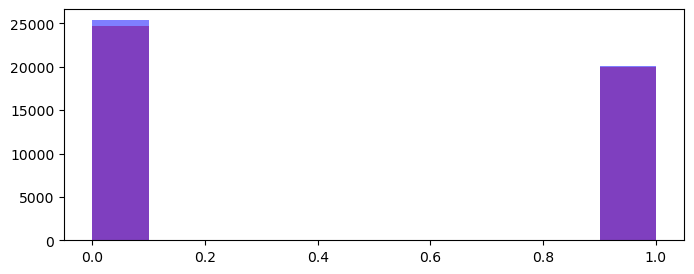

In [37]:
plt.figure(figsize=(8, 3))
control_visit_all = df['retention_1'][df['version'] == 'gate_30']
test_visit_all = df['retention_1'][df['version'] == 'gate_40']

plt.hist(control_visit_all, color='r', alpha = 0.5)
plt.hist(test_visit_all, color='b', alpha = 0.5)

plt.show()

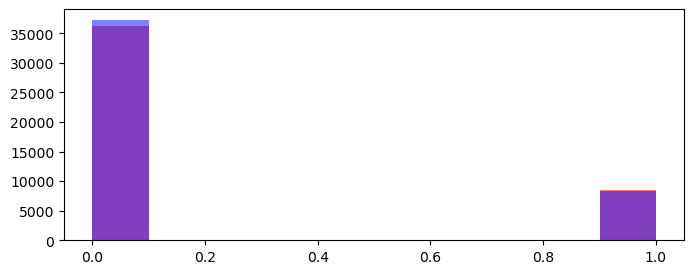

In [35]:
plt.figure(figsize=(8, 3))
control_visit_all = df['retention_7'][df['version'] == 'gate_30']
test_visit_all = df['retention_7'][df['version'] == 'gate_40']

plt.hist(control_visit_all, color='r', alpha = 0.5)
plt.hist(test_visit_all, color='b', alpha = 0.5)

plt.show()

In [40]:
mw_stats = mannwhitneyu(x=df[(df['version'] == 'gate_30')]['retention_1'].values,
                        y=df[(df['version'] == 'gate_40')]['retention_1'].values)

mw_stats

MannwhitneyuResult(statistic=1022682813.0, pvalue=0.07441128639919536)

In [44]:
mw_stats = mannwhitneyu(x=df[(df['version'] == 'gate_30')]['retention_7'].values,
                        y=df[(df['version'] == 'gate_40')]['retention_7'].values)

mw_stats

MannwhitneyuResult(statistic=1025017239.0, pvalue=0.001554344685704005)

Выводы:
Я так понимаю, что если пользователи не вернулись в первый день в игру, то вероятность того, что они вернутся через неделю равна практически нулю. 